In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

import cv2
from pathlib import Path



In [2]:
current_path = Path('.')
TRAIN_DATA_PATH = current_path / '..' / '..'/ 'keras_based_line_identification' / 'data' / 'train'
TEST_DATA_PATH  = current_path / '..' / 'test' / 'images'
MODEL_PATH      = current_path / '..' / 'data' / 'model' / 'model.h5'

IMAGE_SIZE = 32; 


In [3]:
# Lädt ein Bild
def load_image(path,image_size=IMAGE_SIZE):
    img =cv2.imread(path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    tmp = img.reshape([IMAGE_SIZE, IMAGE_SIZE,1])


    return np.array(tmp)/255

In [4]:
def compute_dispersion_ml(model, labels_decoded, path, image_size=IMAGE_SIZE):
    correct_matches = 0
    result_table = PrettyTable()
    result_table.field_names = ["Datei ", "Position", "Wavelength"]

    raw_positions = []
    raw_wavelengths = []
    for filename in sorted(os.listdir(path)):

        if(filename.startswith('.') == False):

            current_wavelength = filename[0:4]
            print (current_wavelength)
            image_path = os.path.join(path,filename)
                
            test_image = load_image(image_path)
            predictions = model.predict(test_image.reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))
                
            index_max_predictions = np.argmax(predictions)
            print('index_max_predictions:',index_max_predictions, current_wavelength, labels_decoded[index_max_predictions])
            decode_wavelength = labels_decoded[index_max_predictions]

            result_table.add_row([image_path, current_wavelength, decode_wavelength])
            raw_positions.append(float(current_wavelength))
            raw_wavelengths.append(float(decode_wavelength))


    print(result_table)

    l = len(raw_positions)

    positions = []
    wavelengths = []

    for l in range(0,l):
        try:
            if raw_wavelengths[l] > raw_wavelengths[l-1] and raw_wavelengths[l] < raw_wavelengths[l+1]:
                positions.append(raw_positions[l])
                wavelengths.append((raw_wavelengths[l]))
        except IndexError:
            pass

    z = [5.16220206e-01,3.93665555e+03]
    p = np.poly1d(z)
    x = range(0,4944)
    waves = p(x)
    
    plt.rcParams['figure.figsize'] = (12,8)
    fig, axes = plt.subplots()
    plt.xlim = [0,4944]
    plt.ylim = [4000,7500]
    plt.plot(x,waves, color='red')
    plt.plot(positions, wavelengths,'+', color='k')
    z_ml = np.polyfit(positions, wavelengths,1)
    p_ml = np.poly1d(z_ml)
    waves_ml = p_ml(x)
    plt.plot(x, waves_ml, color='cyan')        
    plt.ylabel('Wavelength (A)')
    plt.xlabel('Pixel')
    plt.show()
    return z_ml

2025-06-15 16:59:24.497054: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-15 16:59:24.497085: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-15 16:59:24.497089: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-15 16:59:24.497108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-15 16:59:24.497119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


3710
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
index_max_predictions: 0 3710 5852.48
3768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
index_max_predictions: 1 3768 5881.89
3890
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
index_max_predictions: 2 3890 5944.83
3950
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

2025-06-15 16:59:24.780440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
index_max_predictions: 3 3950 5975.53
4056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
index_max_predictions: 4 4056 6029.99
4142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
index_max_predictions: 5 4142 6074.33
4184
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
index_max_predictions: 6 4184 6096.16
4274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 8 4274 6143.06
4314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 9 4314 6163.59
4418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 10 4418 6217.28
4514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 11 4514 6266.49
4588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 12 4588 6304.78
4644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
index_max_predictions: 8 4644 6143.06
+-------------------------+----------+------------+
|          Datei          | Position | Wavelength |
+-------------------------+----------+------------+
| ../test/images/3710.BMP |   3710  

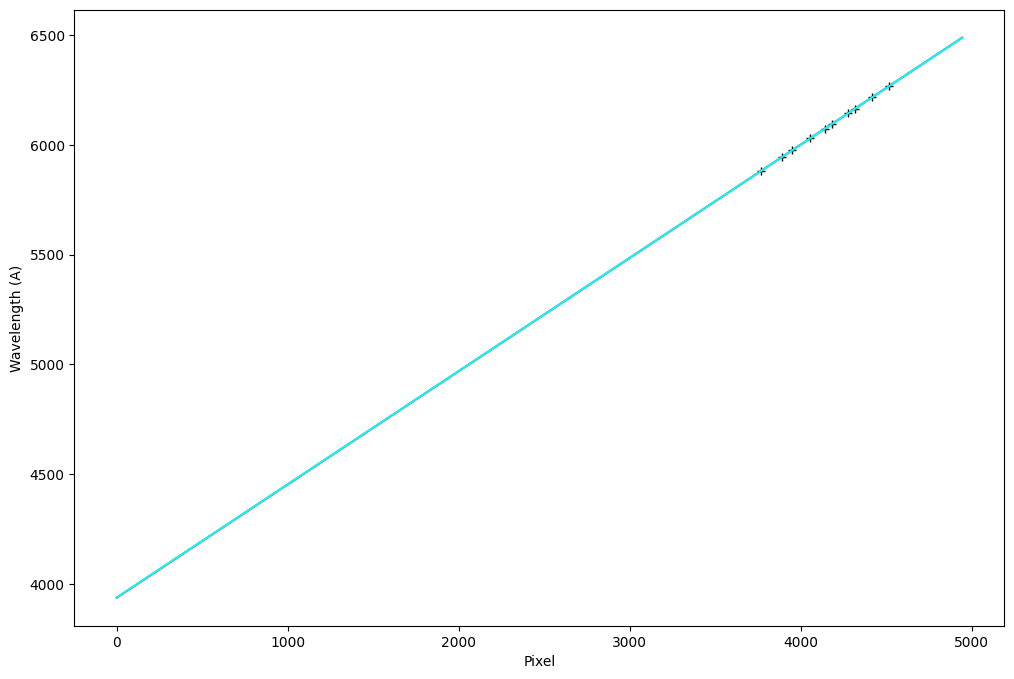

[5.15954560e-01 3.93758762e+03]


In [5]:
labels_decoded = []
for directory in sorted(os.listdir(str(TRAIN_DATA_PATH))):
    if(directory.startswith('.') == False):
        labels_decoded.append(directory)

model = load_model(str(MODEL_PATH))
z_ml = compute_dispersion_ml(model, labels_decoded, str(TEST_DATA_PATH))
print (z_ml)